# Image processing and analysis in Python: an introduction


### 1. Overview & learning objectives
In this notebook, we will discuss the fundamentals of image representation and manipulation in Python.

With this notebook we will:

1. Gain an understanding of how to represent images with Python and **numpy**.

1. Learn how to open and display an image from disk using **scikit-image** and **matplotlib**. 

1. Experiment accessing and modifying pixel values.

Please, **note** that this notebook is not an exhaustive introduction to Python, numpy, scikit-image, or matplotlib. For tutorials and official documentation, please check at the [end of this notebook](#additional_materials).

### 2. Images as Python lists
We will consider a two-dimensional image as a matrix in which each element contains the corresponding pixel value. In Python, **matrices can be represented as lists of lists**:

In [1]:
alist = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]  # square brackets define lists in Python.

print(alist)  # the print command can be useful to visualize the contents of Python variables.

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]


represents a matrix with four rows and three columns.

### 3. Images in numpy: the ndarray
Python is not really good at working with matrices. Fortunately, the **numpy** package provides highly optimized methods to work with multidimensional arrays. At the core of numpy is the **ndarray** data structure, used to store and manipulate arrays. You can use the Python help system to learn more about ndarrays:

In [2]:
import numpy  # loads the numpy package.

# a question mark invokes the Python help system.
numpy.ndarray?

Init signature: numpy.ndarray(self, /, *args, **kwargs)
Docstring:     
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of ints
    Shape of created array.
dtype : data-type, optional
    Any object that can be interpreted as a numpy data type.
buffer : object exposing buffer 

It is easy to create an ndarray from a list using the numpy method **asarray**.

Use the help system to figure out how to create an ndarray from **alist**:

In [3]:
# DELETE THIS CODE.
numpy.asarray?

Signature: numpy.asarray(a, dtype=None, order=None)
Docstring:
Convert the input to an array.

Parameters
----------
a : array_like
    Input data, in any form that can be converted to an array.  This
    includes lists, lists of tuples, tuples, tuples of tuples, tuples
    of lists and ndarrays.
dtype : data-type, optional
    By default, the data-type is inferred from the input data.
order : {'C', 'F'}, optional
    Whether to use row-major (C-style) or
    column-major (Fortran-style) memory representation.
    Defaults to 'C'.

Returns
-------
out : ndarray
    Array interpretation of `a`.  No copy is performed if the input
    is already an ndarray with matching dtype and order.  If `a` is a
    subclass of ndarray, a base class ndarray is returned.

See Also
--------
asanyarray : Similar function which passes through subclasses.
ascontiguousarray : Convert input to a contiguous array.
asfarray : Convert input to a floating point ndarray.
asfortranarray : Convert input to an ndarr

In [4]:
# DELETE THIS CODE.
amatrix = numpy.asarray(alist)

print(amatrix)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


ndarrays have two important properties, **shape** and **dtype**. 

In your own words, explain what each one of these two properties mean and report the values for the ndarray that you just created above. Remember that you can always use the help system.

**shape**: 

**dtype**: 

In [5]:
# DELETE THIS CODE
amatrix.shape?
amatrix.dtype?

print(f'{amatrix.shape}')
print(f'{amatrix.dtype}')

(4, 3)
int64


Type:            dtype
String form:     int64
Length:          0
File:            ~/opt/anaconda3/lib/python3.7/site-packages/numpy/__init__.py
Docstring:       <no docstring>
Class docstring:
dtype(obj, align=False, copy=False)

Create a data type object.

A numpy array is homogeneous, and contains elements described by a
dtype object. A dtype object can be constructed from different
combinations of fundamental numeric types.

Parameters
----------
obj
    Object to be converted to a data type object.
align : bool, optional
    Add padding to the fields to match what a C compiler would output
    for a similar C-struct. Can be ``True`` only if `obj` is a dictionary
    or a comma-separated string. If a struct dtype is being created,
    this also sets a sticky alignment flag ``isalignedstruct``.
copy : bool, optional
    Make a new copy of the data-type object. If ``False``, the result
    may just be a reference to a built-in data-type object.

See also
--------
result_type

Examples

### 4. Opening and displaying images
The **scikit-image** package uses ndarrays to represent images. scikit-image builds efficient routines for image processing and analysis around ndarrays. 

Most often we will not be "creating" images, but opening them from a file. In scikit-image, the **io** module provides the method **imread**, which can be used to open images. 

Import the io module with the following command (**skimage** is short for scikit-image), and use the imread method to read the image **cells.tif**. Make sure that the image is in the same folder as the notebook (this is the case if you are running the notebook in  **binder**).

In [6]:
from skimage import io

In [7]:
# DELETE THIS CODE.
animage = io.imread('cells.tif')

The **matplotlib** package provides functionality to display images and plot data. If you have worked with Matlab, the matplotlib method names will result familiar. 

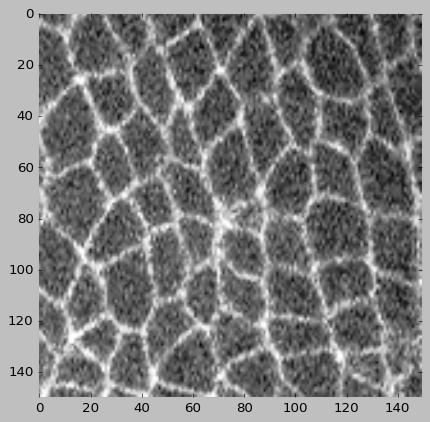

In [10]:
import matplotlib.pyplot as plt
#print(plt.style.available)  # prints all the matplotlib styles that can be used.
plt.style.use(['classic', 'grayscale', 'bmh'])
plt.grid(False)

plt.imshow(animage, cmap='Greys_r')  # set color map to greyscale with dim low pixel values and bright higher ones.
plt.show()

### 5. Accessing pixels

Because images are numpy ndarrays, we can use them as we would use an ndarray. For example, we can access the value of the pixel at coordinates (x, y) = (25, 33) by using:

In [10]:
print(animage[33, 25])  # 2D ndarrays are accessed using [row, col] pairs. 

116


Or we can create a new image using just every other row and column from the top-left corner of the image:

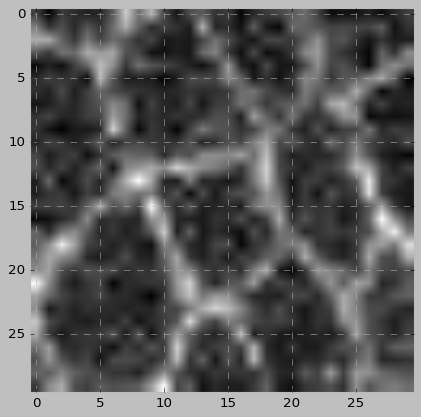

In [11]:
topleft_subsampled = animage[0:60:2, 0:60:2].copy()  # select rows and columns from 0 to 60, with a step of 2 (every other).

plt.imshow(topleft_subsampled, cmap='Greys_r')
plt.show()


Based, on what we have learned so far, answer the following questions. Remember that the help system is your friend!

1. What are the dimensions of the new image that we created?

2. How would you create a copy of a 50x50 subimage on the top right corner of the image? And if you wanted to take one in every three rows, and every single column?

3. Is the call to copy() necessary? Why are we using it?

In [12]:
# DELETE THIS CODE
print(f'1. {topleft_subsampled.shape}')

1. (30, 30)


2. (50, 50)


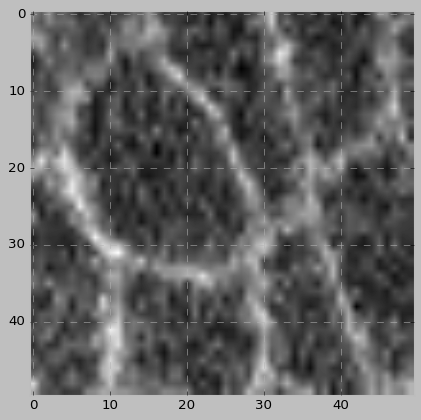

In [13]:
# DELETE THIS CODE.
topright = animage[0:50:1, -51:-1].copy()
print(f'2. {topright.shape}')

plt.imshow(topright, cmap='Greys_r')
plt.show()


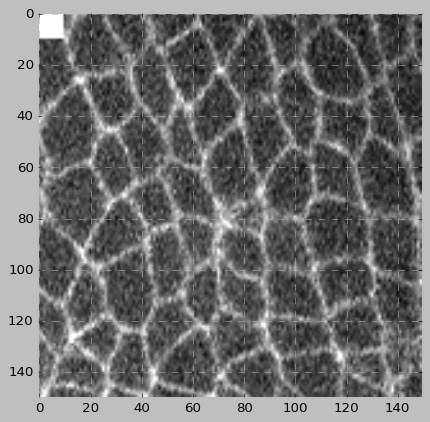

Docstring:
a.copy(order='C')

Return a copy of the array.

Parameters
----------
order : {'C', 'F', 'A', 'K'}, optional
    Controls the memory layout of the copy. 'C' means C-order,
    'F' means F-order, 'A' means 'F' if `a` is Fortran contiguous,
    'C' otherwise. 'K' means match the layout of `a` as closely
    as possible. (Note that this function and :func:`numpy.copy` are very
    similar, but have different default values for their order=
    arguments.)

See also
--------
numpy.copy
numpy.copyto

Examples
--------
>>> x = np.array([[1,2,3],[4,5,6]], order='F')

>>> y = x.copy()

>>> x.fill(0)

>>> x
array([[0, 0, 0],
       [0, 0, 0]])

>>> y
array([[1, 2, 3],
       [4, 5, 6]])

>>> y.flags['C_CONTIGUOUS']
True
Type:      builtin_function_or_method


In [14]:
# DELETE THIS CODE
animage.copy?
# The copy method is not necessary if we are just displaying the images. 
# But see what happens if we do not make a copy and we modify a "view" of an array:
topleft_nocopy = animage[0:60, 0:60]
topleft_nocopy[0:10, 0:10] = 255
plt.imshow(animage, cmap='Greys_r')
plt.show()


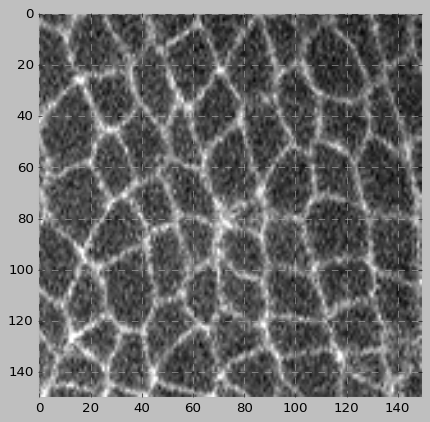

In [15]:
# DELETE THIS CODE.
# In contrast, if we do copy the array:
animage = io.imread('cells.tif')  # read image again.
topleft_copy = animage[0:60, 0:60].copy()
topleft_copy[0:10, 0:10] = 255
plt.imshow(animage, cmap='Greys_r')
plt.show()


<a id='additional_materials'></a>
### 6. Additional materials

#### 6.1 Tutorials
* Python: https://scipy-lectures.org/intro/language/python_language.html
* numpy: https://scipy-lectures.org/intro/numpy/index.html
* scikit-image: https://scipy-lectures.org/packages/scikit-image/index.html
* matplotlib: https://scipy-lectures.org/intro/matplotlib/index.html

#### 6.2 Documentation
* Python: https://docs.python.org/3/
* numpy: https://numpy.org/doc/
* scikit-image: https://scikit-image.org/docs/dev/
* matplotlib: https://matplotlib.org/3.1.1/contents.html